## Observations and Insights 

In [40]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the data table for preview
combined_mousestudy_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')

# sorting by mouse id and remove values that are duplicated
combined_mousestudy_df.sort_values(["Mouse ID", "Timepoint"], inplace = True) 

combined_mousestudy_df.loc[combined_mousestudy_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]

combined_mousestudy_df = combined_mousestudy_df.loc[combined_mousestudy_df["Mouse ID"] != "g989", :]
 
#Display data
#combined_mousestudy_df["Tumor Volume (mm3)"] = combined_mousestudy_df["Tumor Volume (mm3)"].map('{:,.2f}'.format)

combined_mousestudy_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


## Summary Statistics

In [41]:
# Summary statistics table 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen


tumor_volume_avg = combined_mousestudy_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean")
tumor_volume_median = combined_mousestudy_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median")
tumor_volume_variance = combined_mousestudy_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")
tumor_volume_standev = combined_mousestudy_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Standard Deviation")
tumor_volume_sem = combined_mousestudy_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Standard Error of Mean")

Summary_tumor_volume = pd.DataFrame({'Avg Tumor Vol': tumor_volume_avg, 'Mediam Tumor Vol': tumor_volume_median, 
                                     'Tumor Vol Variance': tumor_volume_variance, 'Tumor Vol Standard Deviation': tumor_volume_standev, 
                                     'Tumor Vol Standard Error of Mean': tumor_volume_sem})

Summary_tumor_volume.head()

,Avg Tumor Vol,Mediam Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

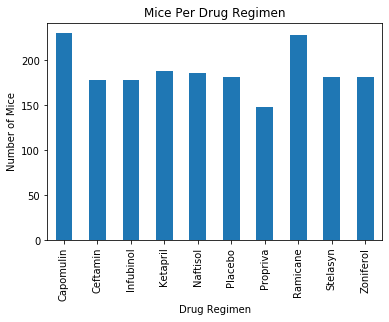

In [57]:
# Grouping mice by drug regimen 
mice_by_treatment = combined_mousestudy_df.groupby("Drug Regimen")

# Count how many number of mice in each regimen
count_mice_by_treatment = mice_by_treatment["Drug Regimen"].count()

# Bar plot displaying number of mice per drug regimen by pandas method

count_chart = count_mice_by_treatment.plot(kind='bar')

# Set the xlabel and ylabel 
plt.title("Mice Per Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

<BarContainer object of 10 artists>

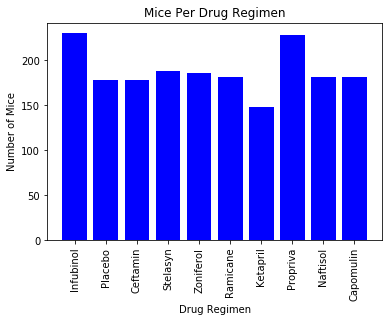

In [88]:
# Bar plot displaying number of mice per drug regimen by pyplot method

drug_regimen = combined_mousestudy_df["Drug Regimen"].unique()
mice_in_treatments = count_mice_by_treatment
x_axis = np.arange(len(mice_in_treatments))

plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)

plt.bar(x_axis, mice_in_treatments, color="b", align="center")


Text(0, 0.5, '')

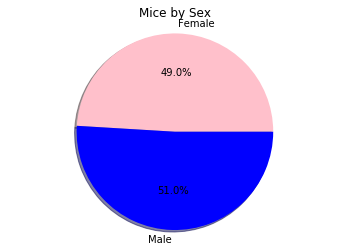

In [136]:
# Grouping mice by drug regimen 
mice_by_sex = combined_mousestudy_df.groupby("Sex")

# Count how many number of mice in each regimen
count_mice_by_sex = mice_by_sex["Sex"].count()

# pie chart displaying the distribution of female versus male mice using pandas

mice_by_sex_chart = count_mice_by_sex.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=0, colors=colors) 
plt.title("Mice by Sex")
plt.axis("equal")
plt.ylabel(None)


(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

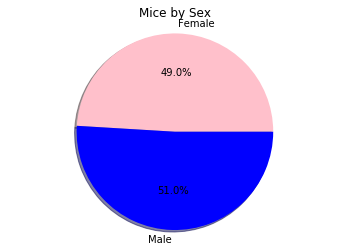

In [127]:
# pie chart displaying the distribution of female versus male mice using pyplot

sex = combined_mousestudy_df["Sex"].unique()
percent_sex = count_mice_by_sex
colors = ["pink", "blue"]
explode = (0,0)

plt.pie(percent_sex, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.title("Mice by Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mice_by_timepoint = combined_mousestudy_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
#max_timepoint = mice_by_timepoint["Timepoint"].max()
mice_by_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
454,a203,Infubinol,0,45.000000
455,a203,Infubinol,5,48.508468
456,a203,Infubinol,10,51.852437
457,a203,Infubinol,15,52.777870
458,a203,Infubinol,20,55.173336
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
